In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Function Declarations

In [2]:
question_lut = np.array(125*[0] + list(range(0, 255, 7)) + 94*[255])

In [3]:
def load_image(file_path: str) -> np.ndarray:
    pil_image = Image.open(file_path)
    return np.array(pil_image)

In [4]:
def img_to_gray(img_arr: np.ndarray) -> np.ndarray:
    return np.array(Image.fromarray(img_arr).convert('L'))

In [5]:
def display_images(img_a: np.ndarray, img_b: np.ndarray, img_c: np.ndarray) -> None:
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 3, 1)
    plt.imshow(img_a)
    plt.title('Image A')
    plt.axis('off')
    
    plt.subplot(2, 3, 2)
    plt.imshow(img_b)
    plt.title('Image B')
    plt.axis('off')
    
    plt.subplot(2, 3, 3)
    plt.imshow(img_c)
    plt.title('Image C')
    plt.axis('off')
    
    plt.subplot(2, 3, 4)
    plt.imshow(img_to_gray(img_a), cmap='gray')
    plt.title('Grayscale A')
    plt.axis('off')
    
    plt.subplot(2, 3, 5)
    plt.imshow(img_to_gray(img_b), cmap='gray')
    plt.title('Grayscale B')
    plt.axis('off')
    
    plt.subplot(2, 3, 6)
    plt.imshow(img_to_gray(img_c), cmap='gray')
    plt.title('Grayscale C')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

In [6]:
def plot_img_histograms(img_a_gray: np.ndarray, img_b_gray: np.ndarray, img_c_gray: np.ndarray) -> None:
    plt.figure(figsize=(15, 15))
    
    plt.subplot(3, 3, 1)
    plt.imshow(img_a_gray, cmap='gray')
    plt.title('Image A')
    plt.axis('off')
    
    plt.subplot(3, 3, 2)
    plt.imshow(img_b_gray, cmap='gray')
    plt.title('Image B')
    plt.axis('off')
    
    plt.subplot(3, 3, 3)
    plt.imshow(img_c_gray, cmap='gray')
    plt.title('Image C')
    plt.axis('off')
    
    plt.subplot(3, 3, 4)
    img_a_hist, img_a_bins, _ = plt.hist(img_a_gray.flatten(), bins=256)
    plt.title('Image A Histogram')
    
    plt.subplot(3, 3, 5)
    img_b_hist, img_b_bins, _ = plt.hist(img_b_gray.flatten(), bins=256)
    plt.title('Image B Histogram')
    
    plt.subplot(3, 3, 6)
    img_c_hist, img_c_bins, _ = plt.hist(img_c_gray.flatten(), bins=256)
    plt.title('Image C Histogram')
    
    plt.subplot(3, 3, 7)
    plt.bar(img_a_bins[:-1], img_a_hist.cumsum())
    plt.title('Image A Cumulated Histogram')
    
    plt.subplot(3, 3, 8)
    plt.bar(img_b_bins[:-1], img_b_hist.cumsum())
    plt.title('Image B Cumulated Histogram')
    
    plt.subplot(3, 3, 9)
    plt.bar(img_c_bins[:-1], img_c_hist.cumsum())
    plt.title('Image C Cumulated Histogram')

In [7]:
def generate_img_via_lookup_table(img_arr: np.ndarray, lut: np.ndarray) -> np.ndarray:
    darkest_px = img_arr.min()
    brightest_px = img_arr.max()
    
    normalized_img = (img_arr - darkest_px) / (brightest_px - darkest_px)
    index_img = np.floor(0.5 + normalized_img * (len(lut) - 1)).astype(int)
    
    return lut[index_img]

In [8]:
def generate_linear_lookup_table(img_arr: np.ndarray) -> np.ndarray:
    # Calculate cumulative distribution function (CDF)
    hist, bins = np.histogram(img_arr.flatten(), bins=256, range=(0, 256))
    cdf = hist.cumsum()
    
    # Normalize CDF to fit the range [0, 255]
    cdf_normalized = ((cdf - cdf.min()) * 255) / (cdf.max() - cdf.min())
    return cdf_normalized.astype(np.uint8)

In [9]:
def visualize_img_transformation_via_lookup_table(original_img: np.ndarray, lut: np.ndarray) -> None:
    plt.figure(figsize=(10, 10))
    
    plt.subplot(2, 2, 1)
    plt.imshow(original_img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(2, 2, 2)
    original_hist, original_bins = np.histogram(original_img, bins=256)
    normalized_hist = (original_hist / np.max(original_hist)) * 255
    plt.bar(original_bins[:-1], normalized_hist)
    plt.plot(lut, color='red')
    plt.title('Original Histogram')
    plt.legend(['Transformation'])
    
    plt.subplot(2, 2, 3)
    new_img = generate_img_via_lookup_table(original_img, lut)
    plt.imshow(new_img, cmap='gray')
    plt.title('Transformed Image')
    plt.axis('off')
    
    plt.subplot(2, 2, 4)
    new_hist, new_bins = np.histogram(new_img, bins=256)
    plt.bar(new_bins[:-1], new_hist)
    plt.title('Transformed Histogram')
    
    plt.show()

In [10]:
def visualize_linear_img_transformation_via_lookup_table(original_img: np.ndarray) -> None:
    lut = generate_linear_lookup_table(original_img)
    
    plt.figure(figsize=(10, 10))
    
    plt.subplot(2, 2, 1)
    plt.imshow(original_img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(2, 2, 2)
    original_hist, original_bins = np.histogram(original_img, bins=256)
    original_normalized_hist = (original_hist / np.max(original_hist)) * 255
    plt.bar(original_bins[:-1], original_normalized_hist)
    plt.plot(lut, color='red')
    plt.title('Original Histogram')
    plt.legend(['Kumulative Summe'])
    
    plt.subplot(2, 2, 3)
    new_img = generate_img_via_lookup_table(original_img, lut)
    plt.imshow(new_img, cmap='gray')
    plt.title('Transformed Image')
    plt.axis('off')
    
    plt.subplot(2, 2, 4)
    new_hist, new_bins = np.histogram(new_img, bins=256)
    new_normalized_hist = (new_hist / np.max(new_hist)) * 255
    plt.bar(new_bins[:-1], new_normalized_hist)
    cdf = new_hist.cumsum()
    normalized_cdf = (cdf / cdf[-1]) * 255
    plt.plot(normalized_cdf, color='red')
    plt.plot([0, 255], [0, 255], color='green')
    plt.title('Transformed Histogram')
    plt.legend(['Kumulative Summe', 'Winkelhalbierende'])
    
    plt.show()

In [11]:
def display_task(task_img: np.ndarray, lut: np.ndarray):
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(task_img, cmap='gray')
    plt.title('Original Image')
    
    plt.subplot(1, 3, 2)
    plt.hist(task_img.flatten(), bins=256, range=(0, 256))
    plt.title('Histogram')
    
    plt.subplot(1, 3, 3)
    transformed_img = generate_img_via_lookup_table(task_img, lut)
    plt.imshow(transformed_img, cmap='gray')
    plt.title('Transformed Image')
    
    plt.show()

In [12]:
def display_solution(task_img: np.ndarray, lut: np.ndarray):
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(task_img, cmap='gray')
    plt.title('Original Image')
    
    plt.subplot(1, 3, 2)
    hist, bins = np.histogram(task_img.flatten(), bins=256)
    hist_normalized = (hist / np.max(hist)) * 255
    plt.bar(bins[:-1], hist_normalized)
    plt.plot(lut, color='red')
    plt.title('Histogram')
    plt.legend(['Transformation'])
    
    plt.subplot(1, 3, 3)
    transformed_img = generate_img_via_lookup_table(task_img, lut)
    plt.imshow(transformed_img, cmap='gray')
    plt.title('Transformed Image')
    
    plt.show()

In [13]:
path_a, path_b, path_c, path_d = 'images/a.jpg', 'images/b.jpg', 'images/c.jpg', 'images/d.jpg'
image_a, image_b, image_c, image_d = load_image(path_a), load_image(path_b), load_image(path_c), load_image(path_d)

# Display Images

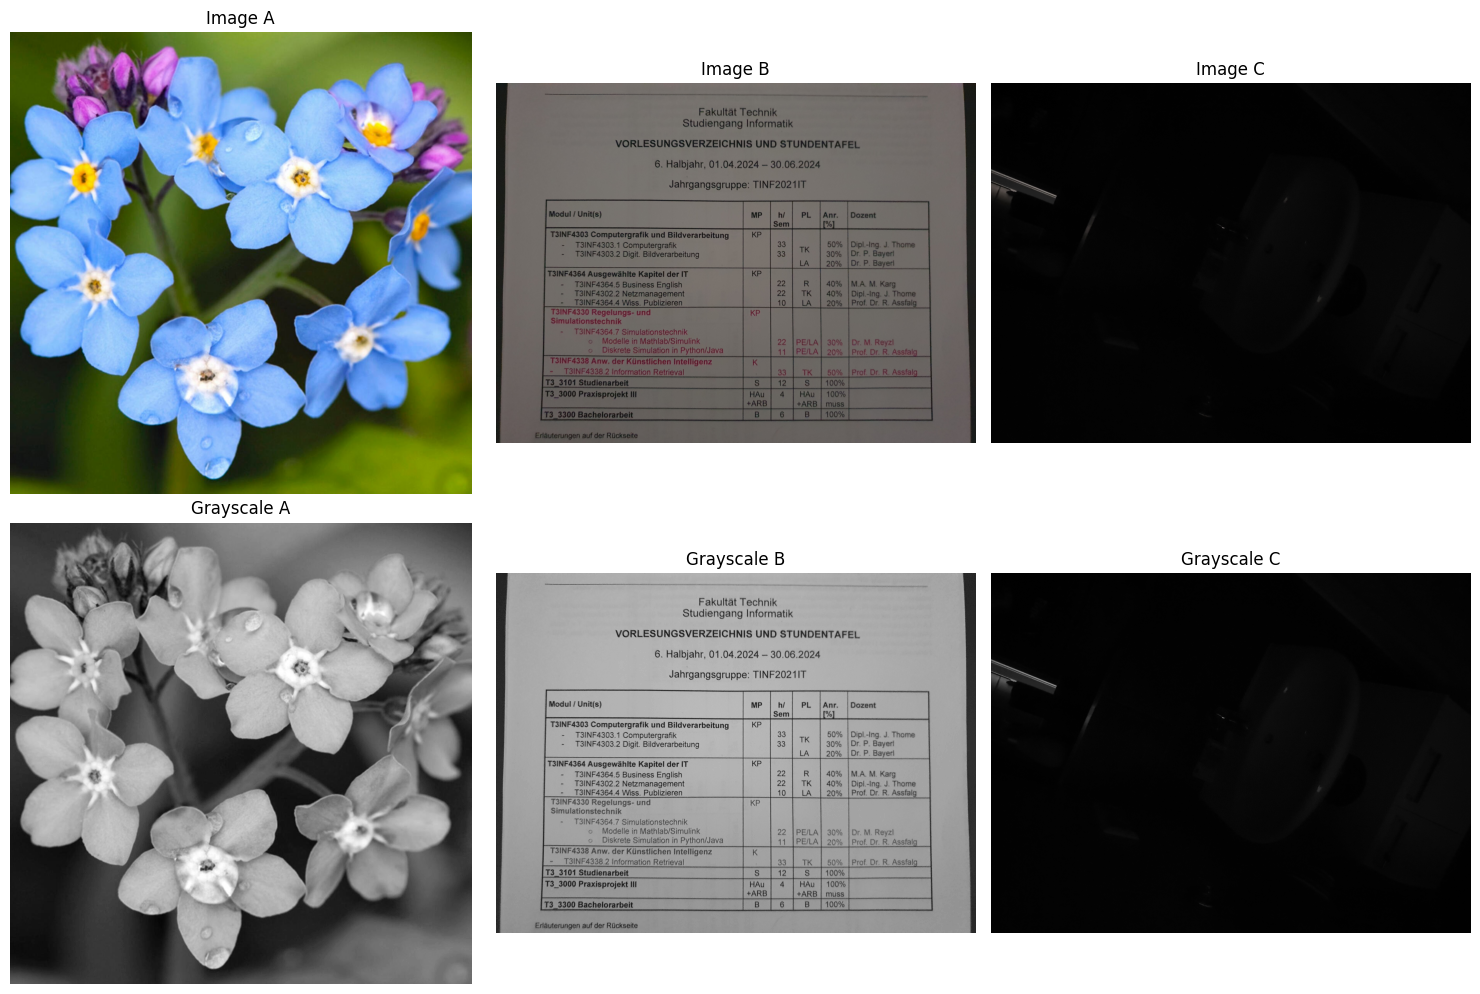

In [14]:
display_images(image_a, image_b, image_c)

# Visualize Histograms of Images

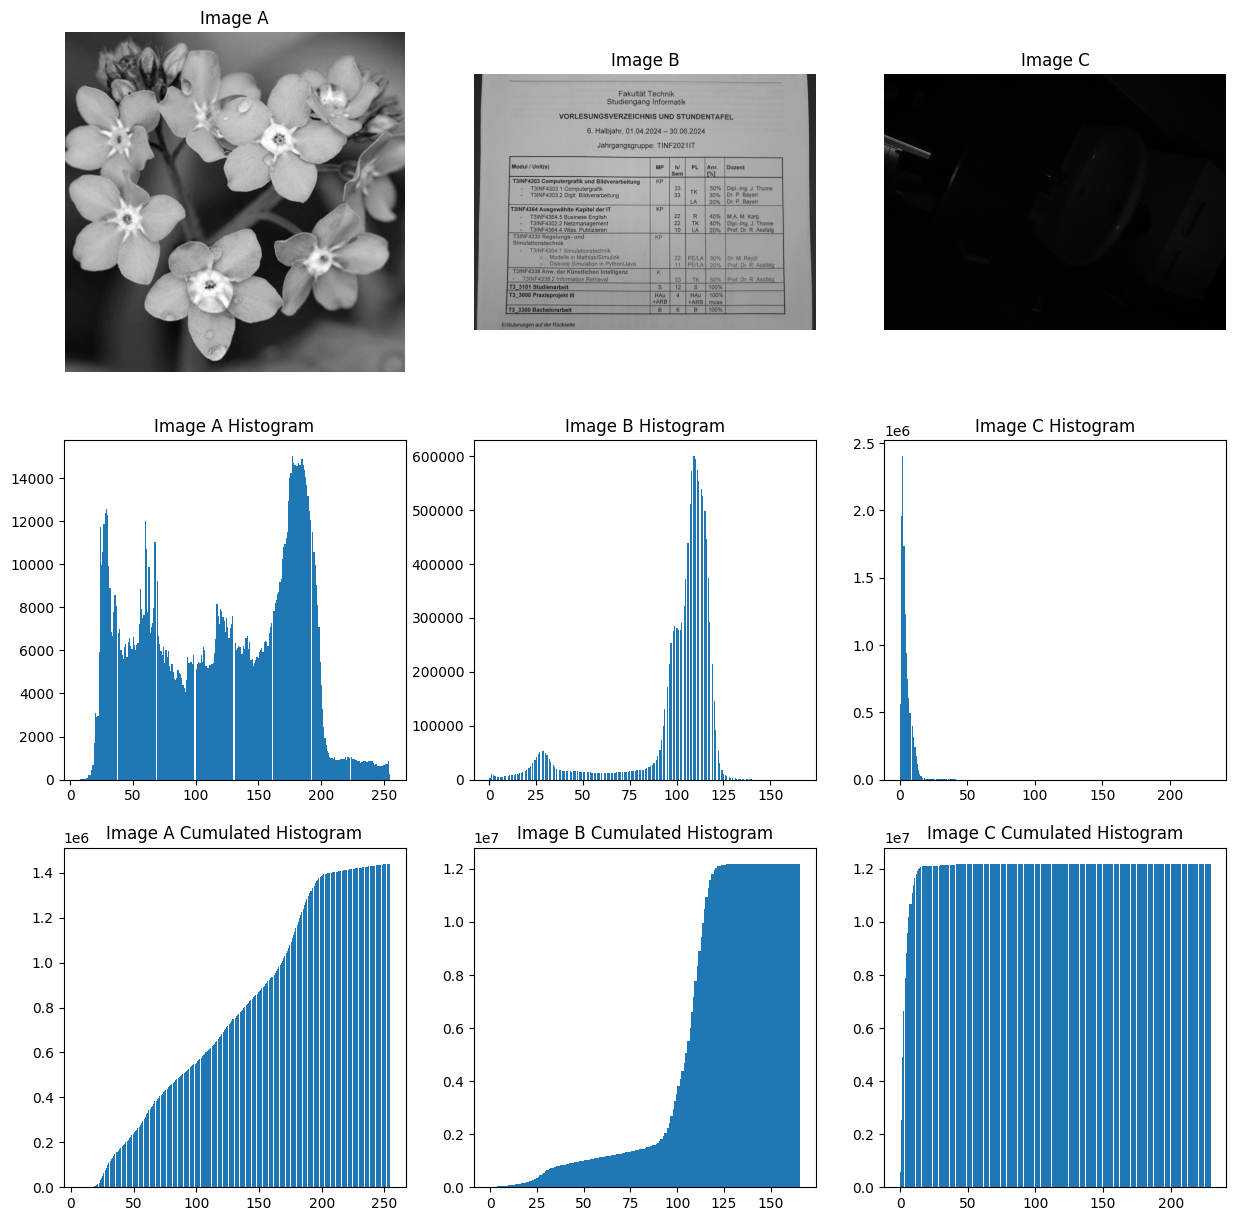

In [15]:
image_a_gray,image_b_gray, image_c_gray, image_d_gray = img_to_gray(image_a), img_to_gray(image_b), img_to_gray(image_c), img_to_gray(image_d)
plot_img_histograms(image_a_gray, image_b_gray, image_c_gray)

# Apply Transformations on Images

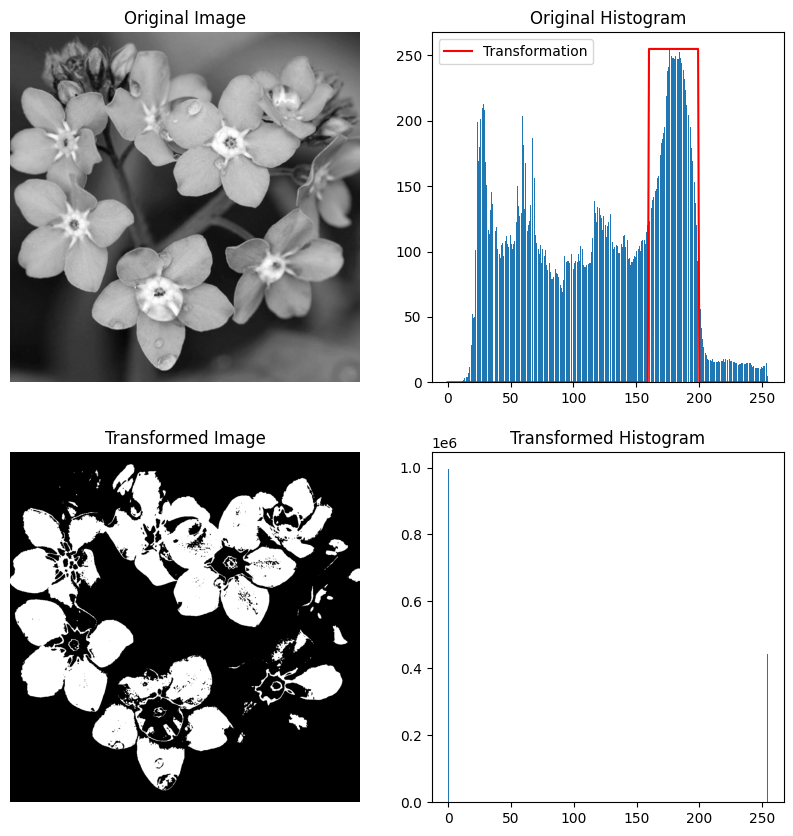

In [16]:
visualize_img_transformation_via_lookup_table(image_a_gray, np.array(160*[0] + 40*[255] + 55*[0]))

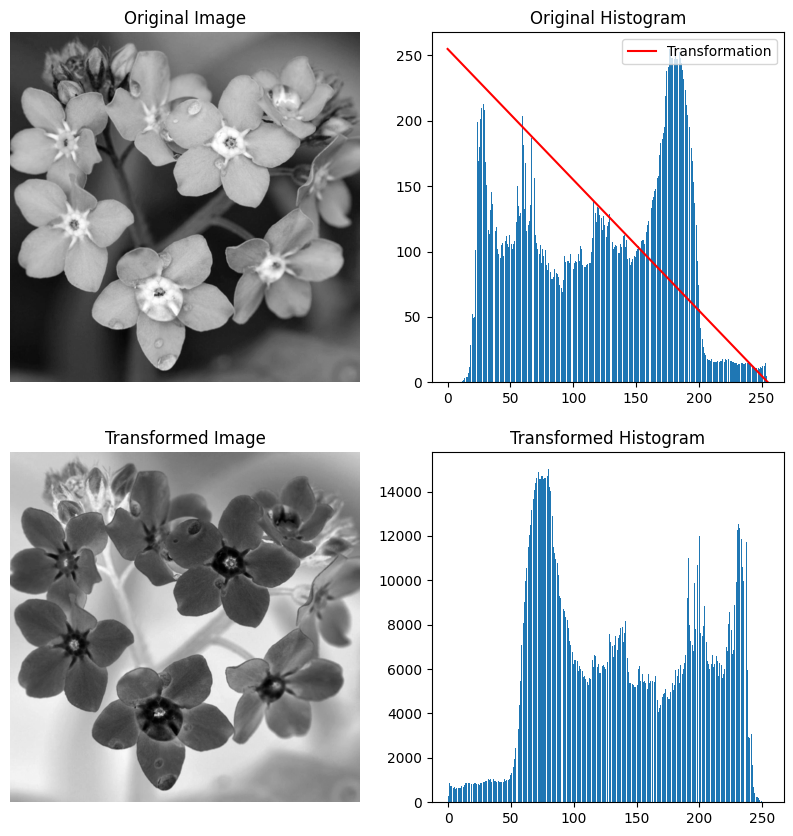

In [17]:
visualize_img_transformation_via_lookup_table(image_a_gray, np.arange(255, -1, -1))

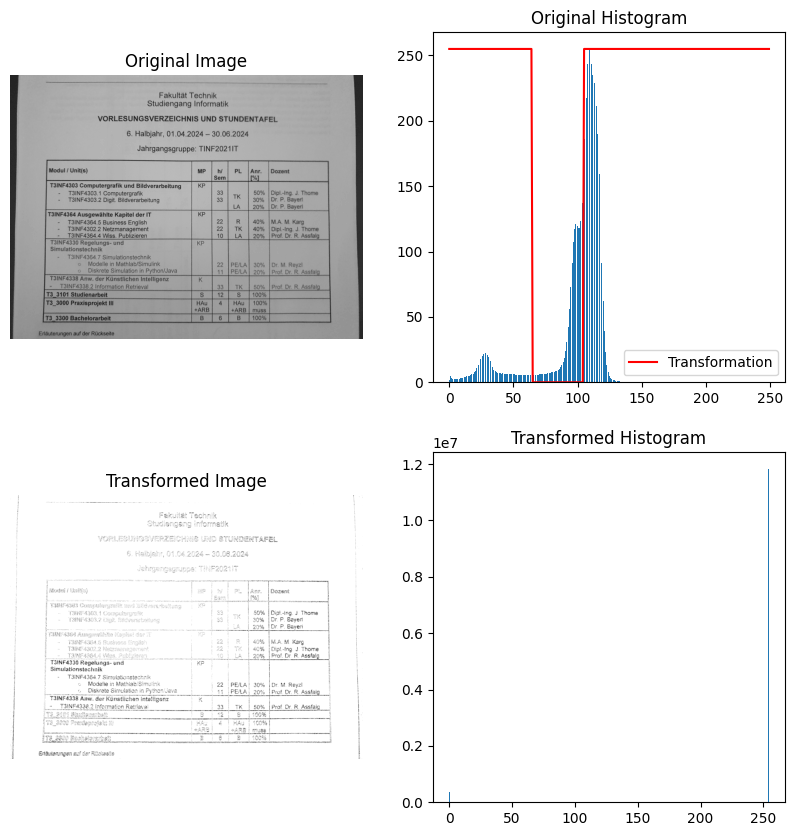

In [18]:
visualize_img_transformation_via_lookup_table(image_b_gray, np.array(65*[255] + 40*[0] + 145*[255]))

# Apply Intensity Transformation on Images

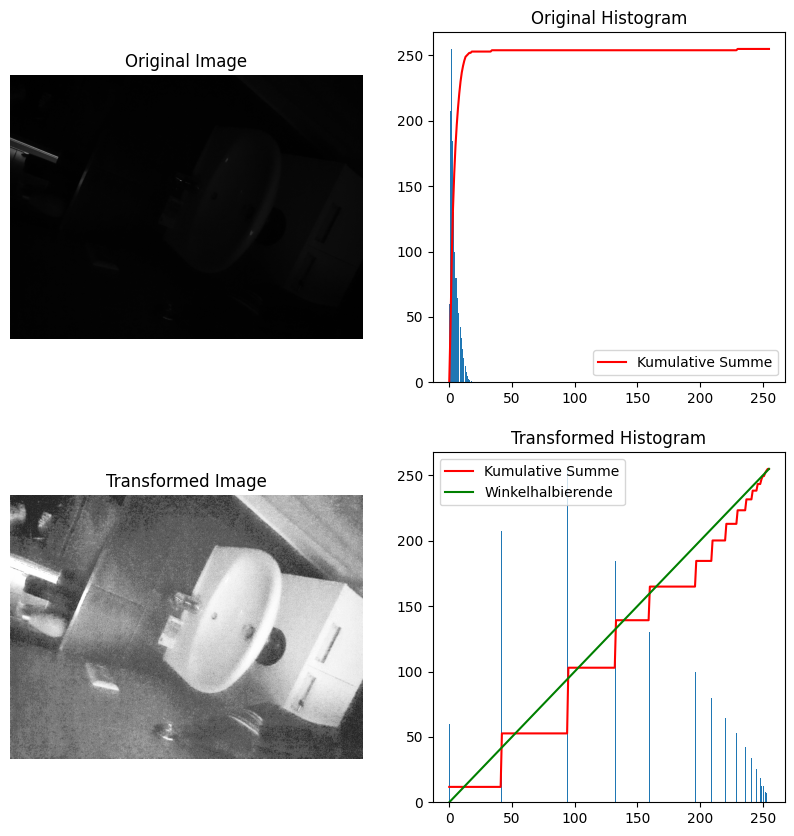

In [20]:
visualize_linear_img_transformation_via_lookup_table(image_c_gray)

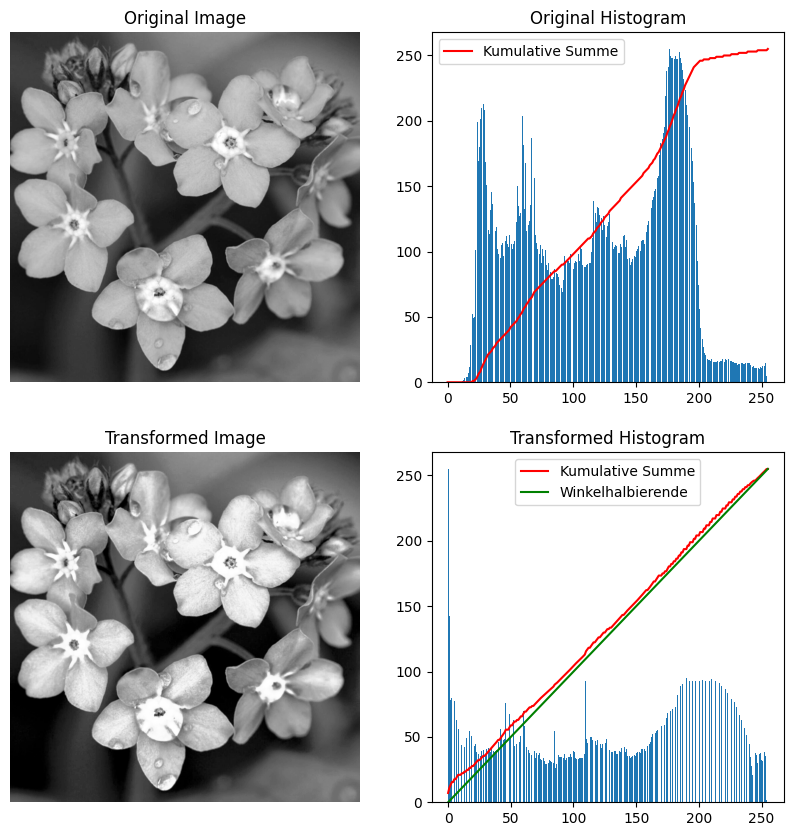

In [21]:
visualize_linear_img_transformation_via_lookup_table(image_a_gray)

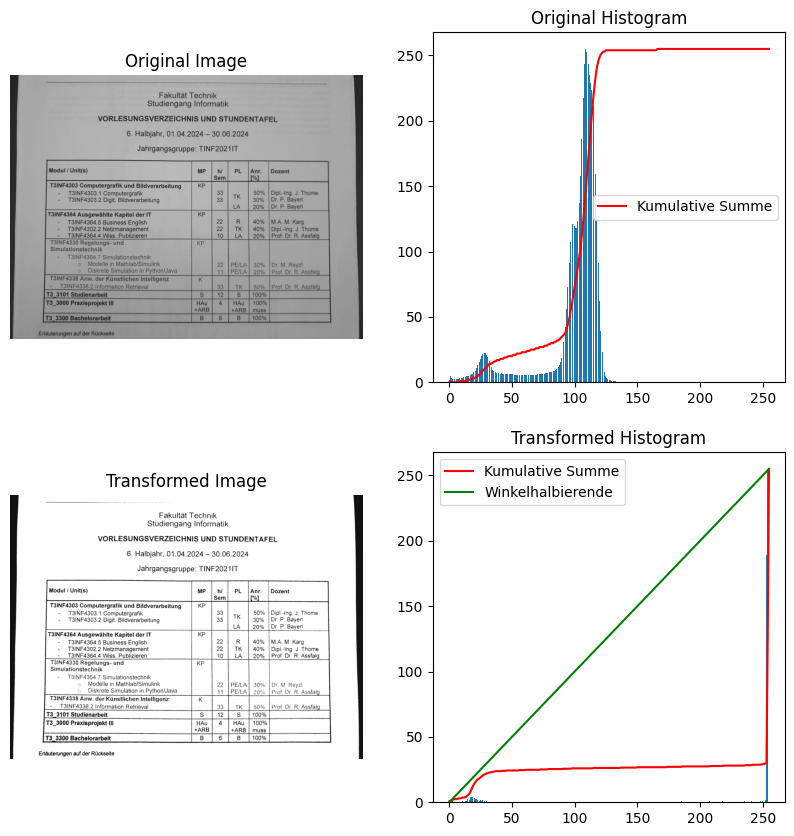

In [22]:
visualize_linear_img_transformation_via_lookup_table(image_b_gray)

# Question

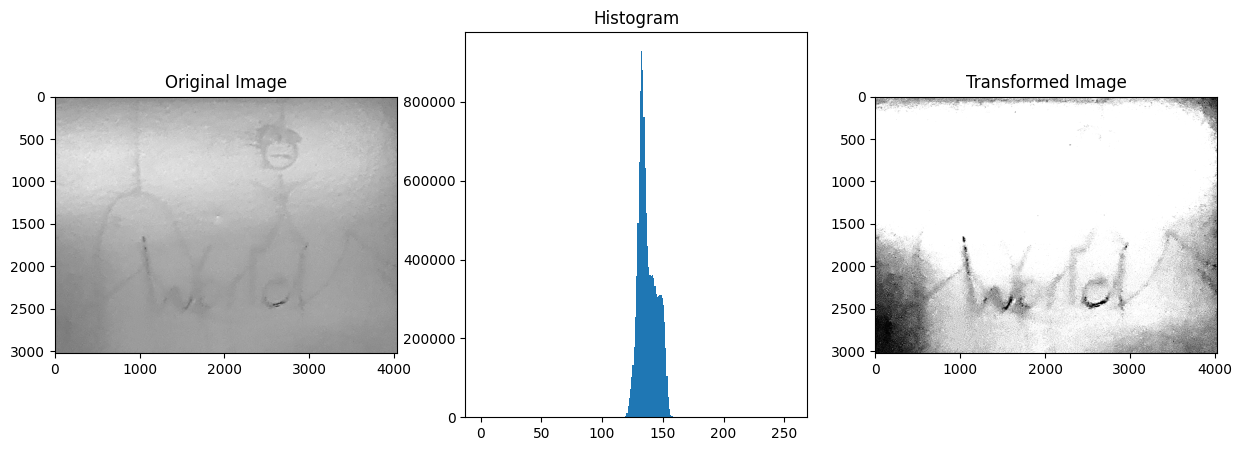

In [23]:
display_task(image_d_gray, question_lut)

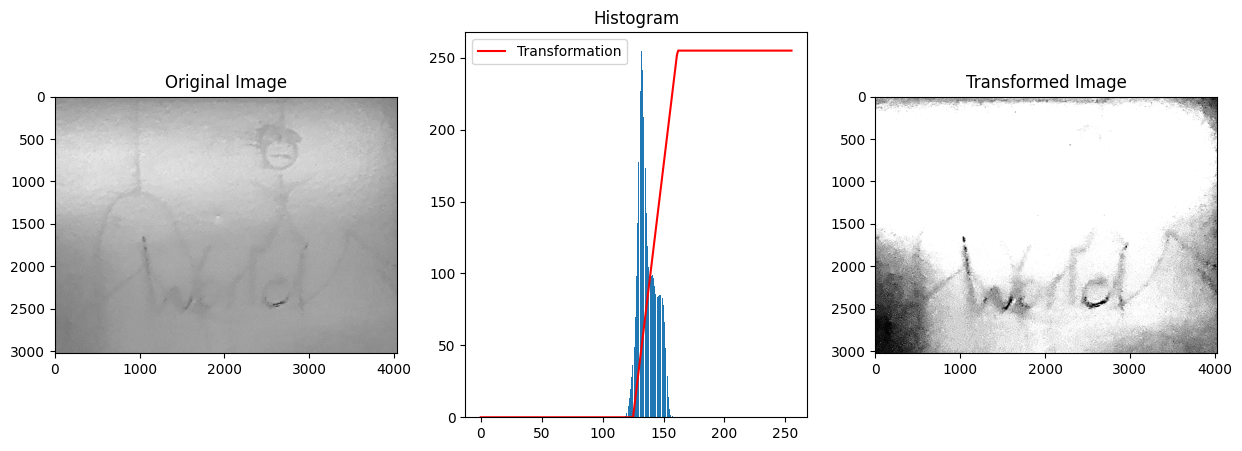

In [24]:
display_solution(image_d_gray, question_lut)